# Linear Models for Classification

# Exercise
Load and preprocess the adult data as before.
include dummy encoding and scaling
Learn a logistic regression model and visualize the coefficients.
Then grid-search the regularization parameter C.
Compare the coefficients of the best model with the coefficients of a model with more regularization.

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
adult = pd.read_csv("data/adult.csv", index_col=0)

In [2]:
# %load solutions/adult_classification.py
import pandas as pd
data = pd.read_csv("data/adult.csv", index_col=0)
data.head()

income = data.income
data_features = data.drop("income", axis=1)

display(data_features.head())


### one hot encode data
data_one_hot = pd.get_dummies(data_features)
data_one_hot.head()


### Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_one_hot, income)

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Cross-validation with default parameters
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

scores = cross_val_score(LogisticRegression(), X_train_scaled, y_train)
print(scores.mean())




,age,workclass,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


0.8515970515970516


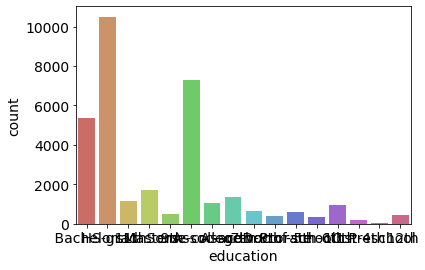

[' Male' ' Female']
percentage of no subscription is 66.92054912318419
percentage of subscription 33.07945087681583


In [3]:
sns.countplot(x='education',data=data, palette='hls')
plt.show()
print(data['gender'].unique())


count_no_sub = len(data[data['gender']==" Male"])
count_sub = len(data[data['gender']==" Female"])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no subscription is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of subscription", pct_of_sub*100)

In [4]:
data.groupby('gender').mean()
data.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income'],
      dtype='object')

Text(0, 0.5, 'Frequency of Purchase')

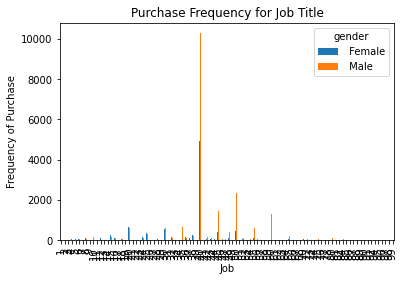

In [8]:
%matplotlib inline
pd.crosstab(data['hours-per-week'],data['gender']).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')



Text(0, 0.5, 'Frequency')

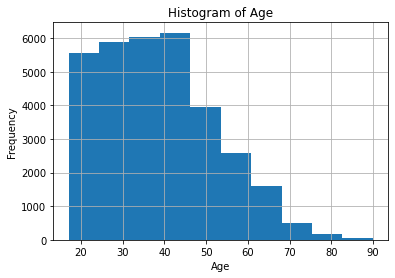

In [7]:

data.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

/Users/nicholasreimold/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


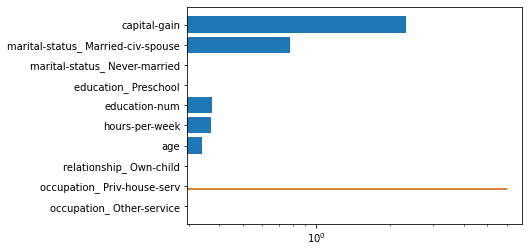

In [15]:

### do grid search

import numpy as np

param_grid = {'C': np.logspace(-3, 3, 7)}
param_grid

from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(LogisticRegression(), param_grid,
                    return_train_score=True)

grid.fit(X_train_scaled, y_train)

grid.best_params_
grid.best_score_

# some visualization

import pandas as pd
%matplotlib inline
res = pd.DataFrame(grid.cv_results_)
res.mean_test_score.plot()
res.mean_train_score.plot()
import matplotlib.pyplot as plt
plt.xscale("log")

grid.score(X_test, y_test)

important = np.argsort(np.abs(grid.best_estimator_.coef_)).ravel()

plt.barh(range(10), grid.best_estimator_.coef_.ravel()[important[-10:]])
plt.yticks(range(10), X_train.columns[important[-10:]]);